# Sprawozdanie -> Dane wielowymiarowe
### Jakub Rudziński

Uwaga: Przed włączeniem skryptów zawartych w sprawozdaniu proszę o uruchomienie wszystkich komórek kodu znajdujących się pod sprawozdaniem. Są tam definicje wszystkich funkcji potrzebnych do działania skryptów zawartych w pracy.

### Opis danych

In [16]:
#Poniżej znajduje sie 10 pierwszych obiektow w celach poglądowych
data.head(10)

,citric acid,residual sugar,pH,alcohol,quality
0,0.00,1.9,3.51,9.4,5
1,0.00,2.6,3.20,9.8,5
2,0.04,2.3,3.26,9.8,5
3,0.56,1.9,3.16,9.8,6
4,0.00,1.9,3.51,9.4,5
5,0.00,1.8,3.51,9.4,5
6,0.06,1.6,3.30,9.4,5
7,0.00,1.2,3.39,10.0,7
8,0.02,2.0,3.36,9.5,7
9,0.36,6.1,3.35,10.5,5


* Citric acid -> kwasek cytrynowy obecny w winie w gramach na litr
* Residual sugar -> Ilosc cukru w winie, która pozostała po okresie fermentacji podana w gramach na litr
* pH -> pH wina
* Alcohol -> stężęnie alkoholu w winie podane w procentach
* Quality -> Subiektywna jakość wina podawana przez testerów w skali od 1 do 8

### Podstawowe statystyki dla poszczególnych zmiennych

In [17]:
basic_stats(data)

Kolumna: citric acid
MIN: 0.0
MAX: 0.56
MIN/MAX: 0.0
Rozstęp r: 0.56
Środek rozkładu zmiennej: 0.28
Srednia: 0.18100000000000002
Q1: 0.005
Q3: 0.2875


Kolumna: residual sugar
MIN: 1.2
MAX: 6.1
MIN/MAX: 0.19672131147540983
Rozstęp r: 4.8999999999999995
Środek rozkładu zmiennej: 3.65
Srednia: 2.363333333333333
Q1: 1.7249999999999999
Q3: 2.3


Kolumna: pH
MIN: 3.04
MAX: 3.58
MIN/MAX: 0.8491620111731844
Rozstęp r: 0.54
Środek rozkładu zmiennej: 3.31
Srednia: 3.316666666666667
Q1: 3.1775
Q3: 3.39


Kolumna: alcohol
MIN: 9.0
MAX: 10.5
MIN/MAX: 0.8571428571428571
Rozstęp r: 1.5
Środek rozkładu zmiennej: 9.75
Srednia: 9.576666666666666
Q1: 9.325000000000001
Q3: 9.8


Kolumna: quality
MIN: 4
MAX: 7
MIN/MAX: 0.5714285714285714
Rozstęp r: 3
Środek rozkładu zmiennej: 5.5
Srednia: 5.333333333333333
Q1: 5.0
Q3: 5.75




### Sprawdzanie normalności rozkładów zmiennych za pomocą testu Shapiro-Wilka

Za pomocą statystyki "W" testu Shapiro-Wilka (funkcja w dziale kodu pod sprawozdaniem) zbadano normalność rozkładu każdej zmiennej. Zmienne wykazujące rozkład inny, niż normalny zostaną następnie poddane transofrmacji (funkcję będą widoczne poniżej) w celu umożliwienia wnioskowania statystycznego dla całej populacji.

In [18]:
print("Statystyka testowa : Rodzaj rozkładu (na podstawie w_kryt = 0.927) : Nazwa kolumny)")
print()

for col in data.columns:
    print(Shapiro_stat(data[col].tolist()))

Statystyka testowa : Rodzaj rozkładu (na podstawie w_kryt = 0.927) : Nazwa kolumny)

(0.8703509314192666, 'Nienormalny', 'citric acid')
(0.6797830244957219, 'Nienormalny', 'residual sugar')
(0.9656115559180151, 'Rozklad normalny', 'pH')
(0.8761974050286631, 'Nienormalny', 'alcohol')
(0.6940860245454549, 'Nienormalny', 'quality')


Transformacji poddano wszystkie zmienne, poza "alcohol".

### Histogramy zmiennych przed tranformacją

Widoczna na histogramach niebieska linia to **KDE** -> Kernel density estimator.

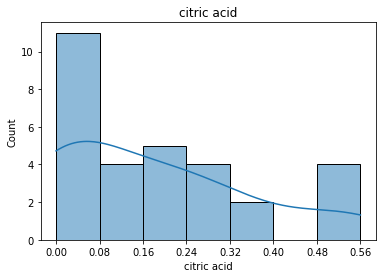

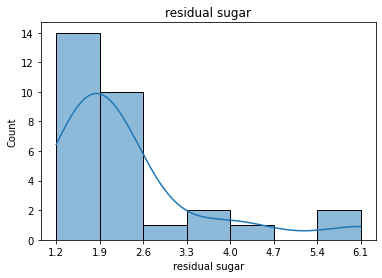

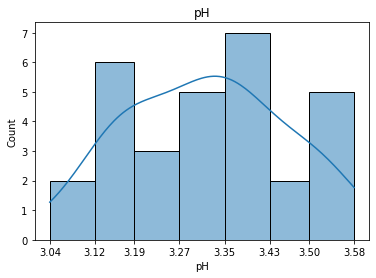

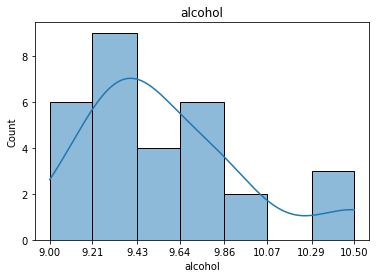

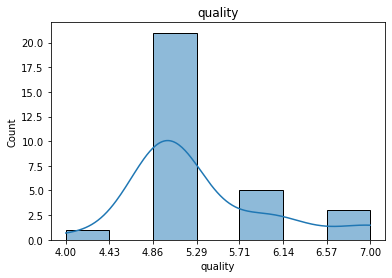

In [19]:
for col in data.columns:
    hist(data[col], col)

Usuwanie danych odstających metodą odstępu kwartylowego (funkcja pod sprawozdaniem).

Nie odnaleziono żadnych danych szczególnie odstających od reszty.

In [20]:
for col in data.columns:
    data[col] = remove_outliers(data[col])

Funkcje transormujące dla zmiennych:

* Citric Acid:    $\log_{10}(x + 2.5)$
* Residual Sugar:    $\log_{10}(x + 0.005)$
* Alcohol:    $\log_{10}(x + 0.6)$
* Quality:    $\log_{10}(x + 0.01)$

### Histogramy zmiennych po transformacji

In [21]:
right_skew_columns = ['citric acid', 'residual sugar', 'alcohol', 'quality']

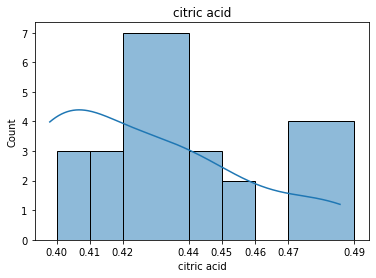

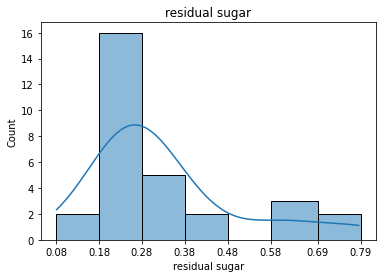

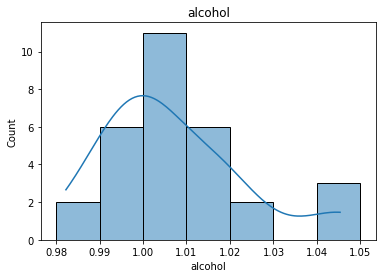

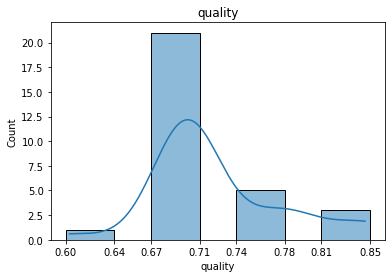

In [22]:
data_transformed = []
a_values = [2.5, 0.005, 0.6, 0.01]
i = 0

for col in right_skew_columns:
    temp = transform_right_skew(data[col], a_values[i])
    data_transformed.append(temp)
    hist(temp, col)
    i += 1

### Podgląd danych po tranformacji

In [23]:
data_transformed = pd.DataFrame(np.transpose(data_transformed))
data_transformed['pH'] = data['pH']
data_transformed.rename(columns = {0 : "citric acid*", 1 : "residual sugar*", 2 : "alcohol*", 3 : "quality*"})

,citric acid*,residual sugar*,alcohol*,quality*,pH
0,0.397940,0.279895,1.000000,0.699838,3.51
1,0.397940,0.415808,1.017033,0.699838,3.20
2,0.404834,0.362671,1.017033,0.699838,3.26
3,0.485721,0.279895,1.017033,0.778874,3.16
4,0.397940,0.279895,1.000000,0.699838,3.51
5,0.397940,0.256477,1.000000,0.699838,3.51
6,0.408240,0.205475,1.000000,0.699838,3.30
7,0.397940,0.080987,1.025306,0.845718,3.39
8,0.401401,0.302114,1.004321,0.845718,3.36
9,0.456366,0.785686,1.045323,0.699838,3.35


In [24]:
data_transformed = data_transformed.rename(columns = {0 : "citric acid*", 1 : "residual sugar*", 2 : "alcohol*", 3 : "quality*"})

In [25]:
data_transformed.to_csv("Data_transformed.csv")

### Analiza korelacji zmiennych

Korelację zmiennych zbadano obliczono

In [26]:
N = len(data.columns)
corr_matrix = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        corr_matrix[i, j] = get_corr_matrix(data.iloc[:,i], data.iloc[:,j])
        
print(corr_matrix)

[[ 1.          0.17337771 -0.4313803   0.25791228  0.25818183]
 [ 0.17337771  1.         -0.02933414  0.36174902 -0.31578476]
 [-0.4313803  -0.02933414  1.          0.20175339 -0.0162796 ]
 [ 0.25791228  0.36174902  0.20175339  1.          0.38173427]
 [ 0.25818183 -0.31578476 -0.0162796   0.38173427  1.        ]]


Macierz korelacji w postaci **heatmap'y:**

<AxesSubplot:>

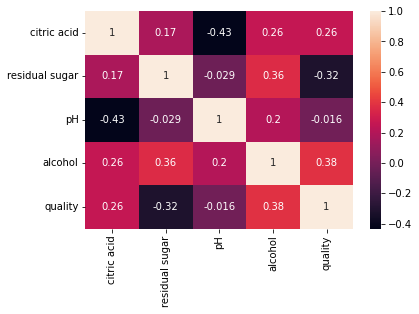

In [27]:
sns.heatmap(corr_matrix, annot = True, xticklabels = data.columns, yticklabels = data.columns)

### Wykresy korelacyjne zmiennych

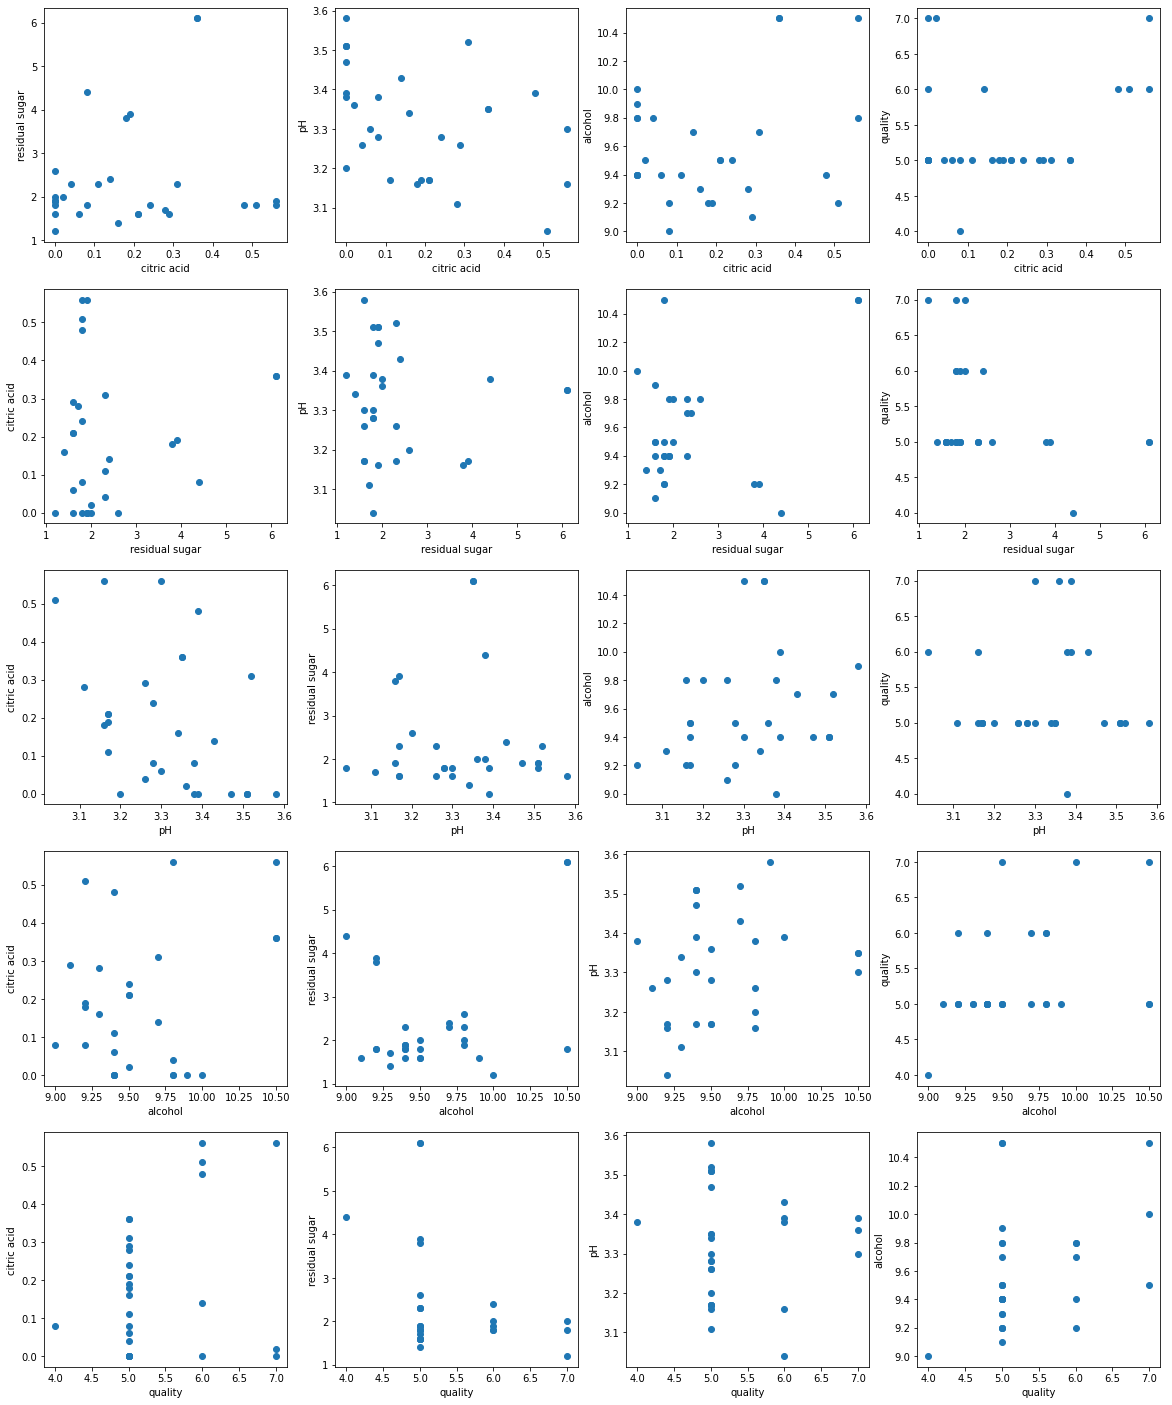

In [28]:
fig, ax = plt.subplots(5,4, figsize = (20,25))

i = 0
for col_1 in data.columns:
    j = 0
    for col_2 in data.columns:
        if col_1 == col_2:
            continue
        ax[i,j].scatter(data[col_1], data[col_2])
        ax[i,j].set_xlabel(col_1)
        ax[i,j].set_ylabel(col_2)
        j += 1
    i += 1

plt.show()

### Wnioski

Największą (ujemną/odwrotną) korelację obserwuje się pomiędzy zmiennymi **"Citric Acid"**, oraz **"pH"**. Jest to spowodowane bezpośrednim wziązkiem chemiczno-fizycznym pomiędzy kwasem cytrynowym a pH roztworu (w tym przypadku wina). Zwiększenie poziomu kwasu spowoduje jednoczesne zmniejszenie wartości pH, co obrazuje ujemny wspołczynnik korelacji.

Ledwo zauważalną, jednak występującą korelację można zaobserwować pomiędzy jakością wina (**Quality**) a stężęniem alkoholu (**Alcohol**). Wraz ze wzrostem stężenia alkoholu w winie następuje delikatny, wprost proporcjonalny wzrost średniej jakości wina (choć te wniosku wymagają przyjrzenia się większemu zestawowi danych).


### Poniżej znajduje się część kodu, która potrzebna jest jedynie do działania skryptów zamieszczonych w notatniku. Nie jest ona częścią sprawozdania.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from matplotlib import pyplot as plt
from scipy import stats

In [9]:
def basic_stats(data):
    for col in data.columns:
        print(f"Kolumna: {col}")
        print(f'MIN: {data[col].min()}')
        print(f'MAX: {data[col].max()}')
        print(f'MIN/MAX: {data[col].min() / data[col].max()}')
        print(f'Rozstęp r: {data[col].max() - data[col].min()}')
        print(f'Środek rozkładu zmiennej: {(data[col].min() + data[col].max()) / 2}')
        print(f'Srednia: {np.mean(data[col])}')
        print(f'Q1: {data[col].quantile(0.25)}')
        print(f'Q3: {data[col].quantile(0.75)}')
        print()
        print()

In [10]:
data_whole = pd.read_csv("winequality-red.csv")
data = data_whole.head(30)
columns = ["citric acid", 'residual sugar', 'pH', 'alcohol', 'quality']
data = data[columns]

In [11]:
def hist(data, col):
    n, bins = np.histogram(data, bins = len(data) // 4)
    
    bins_rounded = []
    for value in bins:
        bins_rounded.append(round(value, 2))
        
    sns.histplot(data, bins = bins_rounded, kde = True )
    plt.title(f'{col}')
    plt.xticks(bins_rounded)
    plt.show()

In [12]:
# Obliczenia statystyki Shapiro

def Shapiro_stat(data):
    #Wartosci A tylko dla 30 rekordów
    a = [0.4254, 0.2944, 0.2487, 0.2148, 0.187, 0.163, 0.1415, 0.1219, 0.1036, 0.0862, 0.0697, 0.0537, 0.0381, 0.0227, 0.0076]
    
    data.sort()
    var = sum((x - np.mean(data)) ** 2 for x in data)
    
    m = 15
    
    b = 0
    for i in range(m):
        b += a[i] * (data[-1-i] - data[i])
        
    W = (b**2) / var
    
    res = "Nienormalny"
    if W > 0.927:
        res = 'Rozklad normalny'
    
    return W, res, col

In [13]:
# Funkcja usuwajaca dane odstajace z kolumny 
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    data = data[~((data < (Q1 - 1.5*IQR))) | (data > (Q3 + 1.5*IQR)).any()]
    return data

In [14]:
def transform_right_skew(data, a_val):
    return np.log10(data + a_val)

In [15]:
def get_corr_matrix(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    
    return sum((x_i - x_mean) * (y_i - y_mean) for x_i, y_i in zip(x,y)) / np.sqrt(sum((x_i - x_mean) **2 for x_i in x) * sum((y_i - y_mean) ** 2 for y_i in y))